In [3]:
#import libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Activation,Dropout,Flatten,Dense
from keras import backend as k
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [4]:
test_data=pd.read_csv('sign_mnist_test.csv')
train_data=pd.read_csv('sign_mnist_train.csv')

In [5]:
x_train=train_data.iloc[:,1:]
y_train=train_data.iloc[:,0:1]

x_test=test_data.iloc[:,1:]
y_test=test_data.iloc[:,0:1]

In [6]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(27455, 784)
(7172, 784)
(27455, 1)
(7172, 1)


In [7]:
#Reshape the data to fit the model
x_train=x_train.values.reshape(27455,28,28,1)
x_test=x_test.values.reshape(7172,28,28,1)

In [8]:
from keras.utils import to_categorical


#One -hot Encoding: covert labels into a set of 10 numbers to give input into the neural network
y_train_one_hot=to_categorical(y_train)
y_test_one_hot=to_categorical(y_test)

#instead of label 5 we are gonna see a value of 1 at the index 5
#print the new label
print(y_train_one_hot[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [22]:
#Built the CNN model

#Create Architecture
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [23]:
#create the CNN

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(25))
model.add(Activation('sigmoid'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
activation_7 (Activation)    (None, 11, 11, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          18496     
__________

In [24]:
#compile the model 

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [25]:
#Train the model

hist=model.fit(x_train,y_train_one_hot, validation_data=(x_test,y_test_one_hot),batch_size=32,epochs=10)

Train on 27455 samples, validate on 7172 samples
Epoch 1/10
27455/27455 [==============================] - 28s 1ms/step - loss: 0.1602 - acc: 0.9546 - val_loss: 0.0631 - val_acc: 0.9730
Epoch 2/10
27455/27455 [==============================] - 26s 941us/step - loss: 0.0405 - acc: 0.9840 - val_loss: 0.0519 - val_acc: 0.9823
Epoch 3/10
27455/27455 [==============================] - 26s 957us/step - loss: 0.0180 - acc: 0.9932 - val_loss: 0.0362 - val_acc: 0.9891
Epoch 4/10
27455/27455 [==============================] - 26s 951us/step - loss: 0.0117 - acc: 0.9958 - val_loss: 0.0431 - val_acc: 0.9901
Epoch 5/10
27455/27455 [==============================] - 26s 953us/step - loss: 0.0091 - acc: 0.9968 - val_loss: 0.0448 - val_acc: 0.9909
Epoch 6/10
27455/27455 [==============================] - 26s 958us/step - loss: 0.0078 - acc: 0.9974 - val_loss: 0.0459 - val_acc: 0.9911
Epoch 7/10
27455/27455 [==============================] - 26s 953us/step - loss: 0.0071 - acc: 0.9977 - val_loss: 0.050

{'val_loss': [0.06307836934275887, 0.05189716292579481, 0.03622156647758582, 0.043100452733086395, 0.044770626624452955, 0.04590079643804766, 0.050307228103720535, 0.03904348131279215, 0.05735790851275082, 0.05661497065850429], 'val_acc': [0.9730228805967502, 0.9822699536974046, 0.9891020718461232, 0.9900669357461499, 0.9909369855105246, 0.9911489199475078, 0.9912827752917024, 0.992158401497768, 0.9914166283753753, 0.9912827739619836], 'loss': [0.1602480117335408, 0.04048656981131067, 0.018003403170309396, 0.011662676996846404, 0.0091428869352168, 0.007827492678927048, 0.007098996881605893, 0.0067470841543495665, 0.006532714624115863, 0.006228060439099091], 'acc': [0.9545889660431114, 0.9839956432955445, 0.993172834048048, 0.9957763650013088, 0.9968326356019767, 0.9973760677825513, 0.9976834801024501, 0.9978655947967645, 0.9979253285071429, 0.9980506246716484]}


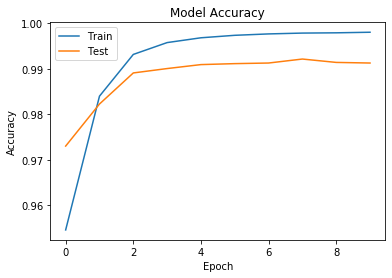

In [26]:
#visualize the model's accuracy

print(hist.history)

plt.plot(hist.history['acc']) 
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Test'],loc='upper left')

In [31]:
#print our predictions as number labels
predictions=model.predict(x_test[:4])
prediction_label=np.argmax(predictions,axis=1)
print(prediction_label)

#print actual labels
print(y_test[:4])

[ 6  5 10  0]
   label
0      6
1      5
2     10
3      0


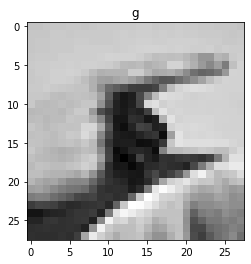

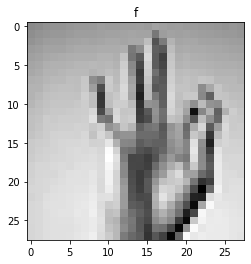

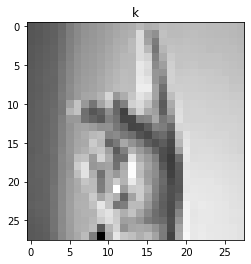

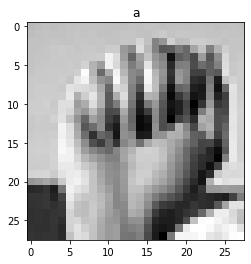

In [36]:
#show first four images as pictures
for i in range(4):
    test_image=x_test[i]
    test_image=np.array(test_image,dtype='float')
    pixels=test_image.reshape(28,28)
    plt.title(str(chr(97+prediction_label[i])))
    plt.imshow(pixels,cmap='gray')
    plt.show()

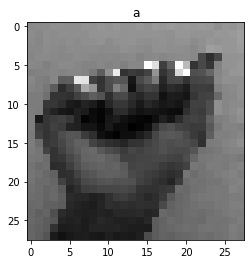

In [74]:
from keras.preprocessing import image

#predict one image
img_pred=image.load_img('my_test/a2.jpg',color_mode = "grayscale",target_size=(28,28,1))
img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)

#show result as alphabet with image
result=np.argmax(result,axis=1)
result=str(chr(97+result))


img_pred=np.array(img_pred,dtype='float')
pixels=img_pred.reshape(28,28)
plt.title(result)
plt.imshow(pixels,cmap='gray')
plt.show()